Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [86]:
# imports
import requests
import pandas as pd
import os
import sqlite3

#EBIKES DATAFRAME

In [88]:
con = sqlite3.connect('../data/ebikes.db') 
query = """
    SELECT *
    FROM ebikes
"""
ebikes_df = pd.read_sql_query(query, con)
con.close()
ebikes_df

,free_bikes,id,longitude,latitude
0,8,7a19c49f486d7c0c02b3685d7b240448,-123.114397,49.262487
1,11,32603a87cfca71d0f7dfa3513bad69d5,-123.121817,49.274566
2,0,6d42fa40360f9a6b2bf641c7b8bb2862,-123.110154,49.279764
3,8,66f873d641d448bd1572ab086665a458,-123.113504,49.260599
4,0,485d4d24c803cfde829ab89699fed833,-123.117772,49.264215
...,...,...,...,...
247,7,10acadd77bc21f26a7f09d8c74d4af2d,-123.114237,49.277773
248,1,58345bb719f4e570ed4edc9dfa6a68a2,-123.254307,49.263073
249,5,261efc67071963969b3f848c66454d97,-123.250902,49.259999
250,4,ee620d77724c8993b0d366e7ec655b64,-123.236210,49.254780


#FOURSQUARE DATAFRAME

In [89]:
con = sqlite3.connect('../data/ebikes.db') 
query = """
    SELECT *
    FROM foursquare
"""
foursquare_df = pd.read_sql_query(query, con)
con.close()
foursquare_df

,station_id,name,category,distance,rating,price
0,7a19c49f486d7c0c02b3685d7b240448,La Taqueria Pinche Taco Shop,Taco Restaurant,164,8.4,2.0
1,7a19c49f486d7c0c02b3685d7b240448,Whole Foods,Grocery Store,182,8.6,3.0
2,7a19c49f486d7c0c02b3685d7b240448,Hokkaido Ramen Santouka,Ramen Restaurant,186,7.8,NaN
3,7a19c49f486d7c0c02b3685d7b240448,Cactus Club Cafe Broadway + Ash,American Restaurant,232,7.5,3.0
4,7a19c49f486d7c0c02b3685d7b240448,Solly's Bagelry,Bakery,283,7.9,2.0
...,...,...,...,...,...,...
2509,e02dd224b0177c65418bcb3f72d2f77d,Donald's Market,Grocery Store,501,8.7,NaN
2510,e02dd224b0177c65418bcb3f72d2f77d,Tacofino Commissary,Mexican Restaurant,506,8.6,2.0
2511,e02dd224b0177c65418bcb3f72d2f77d,Platform 7 Coffee,Café,507,8.4,1.0
2512,e02dd224b0177c65418bcb3f72d2f77d,The Downlow Chicken Shack,Fried Chicken Joint,610,8.6,1.0


#YELP DATAFRAME

In [90]:
con = sqlite3.connect('../data/ebikes.db') 
query = """
    SELECT *
    FROM yelp
"""
yelp_df = pd.read_sql_query(query, con)
con.close()
yelp_df
#scaling the rating to match foursquare's 10 point system
yelp_df['rating'] = yelp_df['rating'] * 2
yelp_df

,station_id,name,category,distance,rating,price
0,7a19c49f486d7c0c02b3685d7b240448,Seaport City Seafood Restaurant,vietnamese,168.615262,8.6,None
1,7a19c49f486d7c0c02b3685d7b240448,Saku,italian,178.845344,8.6,$$
2,7a19c49f486d7c0c02b3685d7b240448,Marulilu Cafe,diners,102.329817,8.0,$$
3,7a19c49f486d7c0c02b3685d7b240448,La Taqueria Pinche Taco Shop,wine_bars,169.517456,8.4,$$
4,7a19c49f486d7c0c02b3685d7b240448,A.Bento,thai,332.277954,7.8,$$
...,...,...,...,...,...,...
2502,e02dd224b0177c65418bcb3f72d2f77d,Jackalope's Neighbourhood Dive,None,456.399411,8.6,$$
2503,e02dd224b0177c65418bcb3f72d2f77d,Via Tevere Pizzeria,None,502.045245,8.2,$$
2504,e02dd224b0177c65418bcb3f72d2f77d,Absinthe Bistro,None,589.228697,9.2,$$$
2505,e02dd224b0177c65418bcb3f72d2f77d,Caffe La Tana,None,680.684474,9.2,None


Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [91]:
#joining to the yelp and foursquare dataframes together using union
poi_join = pd.concat([foursquare_df,yelp_df], ignore_index= True)
poi_join = poi_join.drop_duplicates(subset=['name'], ignore_index=True)
poi_join

,station_id,name,category,distance,rating,price
0,7a19c49f486d7c0c02b3685d7b240448,La Taqueria Pinche Taco Shop,Taco Restaurant,164.000000,8.4,2.0
1,7a19c49f486d7c0c02b3685d7b240448,Whole Foods,Grocery Store,182.000000,8.6,3.0
2,7a19c49f486d7c0c02b3685d7b240448,Hokkaido Ramen Santouka,Ramen Restaurant,186.000000,7.8,NaN
3,7a19c49f486d7c0c02b3685d7b240448,Cactus Club Cafe Broadway + Ash,American Restaurant,232.000000,7.5,3.0
4,7a19c49f486d7c0c02b3685d7b240448,Solly's Bagelry,Bakery,283.000000,7.9,2.0
...,...,...,...,...,...,...
852,ee620d77724c8993b0d366e7ec655b64,Nicli Antica Pizzeria,None,72.869669,5.0,None
853,ee620d77724c8993b0d366e7ec655b64,Togo Sushi,None,61.784294,4.6,$
854,ee620d77724c8993b0d366e7ec655b64,Freshii,None,70.443227,5.6,None
855,ee620d77724c8993b0d366e7ec655b64,Bubble Waffle Cafe,None,1038.485055,0.0,None


In [92]:
#Joining the ebike free bikes to the poi_join based on the station id
ebikes_df = ebikes_df.rename(columns={'id': 'station_id'})
full_join = pd.merge(poi_join, ebikes_df,on='station_id', how='left')
full_join = full_join.drop(columns=['category', 'price', 'longitude', 'latitude'])
full_join

,station_id,name,distance,rating,free_bikes
0,7a19c49f486d7c0c02b3685d7b240448,La Taqueria Pinche Taco Shop,164.000000,8.4,8
1,7a19c49f486d7c0c02b3685d7b240448,Whole Foods,182.000000,8.6,8
2,7a19c49f486d7c0c02b3685d7b240448,Hokkaido Ramen Santouka,186.000000,7.8,8
3,7a19c49f486d7c0c02b3685d7b240448,Cactus Club Cafe Broadway + Ash,232.000000,7.5,8
4,7a19c49f486d7c0c02b3685d7b240448,Solly's Bagelry,283.000000,7.9,8
...,...,...,...,...,...
852,ee620d77724c8993b0d366e7ec655b64,Nicli Antica Pizzeria,72.869669,5.0,4
853,ee620d77724c8993b0d366e7ec655b64,Togo Sushi,61.784294,4.6,4
854,ee620d77724c8993b0d366e7ec655b64,Freshii,70.443227,5.6,4
855,ee620d77724c8993b0d366e7ec655b64,Bubble Waffle Cafe,1038.485055,0.0,4


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [93]:
#Determining the number of POI results per get request after duplicate removed- Maximum 10 per station 1000 meter radius request
full_join.groupby('station_id').size()

station_id
00fa94ad698dc4a9e4d708d6fd32f294    4
012d3e06901cc222b1c2cf0a2ace3a29    3
0459b7e93703980b853cd65a9dc60596    2
06487275cd19694152824c7c3088e8ff    1
064a7b39b1dbc4bfc4cf8f454e360c57    6
                                   ..
fad9ebcf614dd1a72593a34072ff76f8    5
fbb1d30d7f30b049873f5be5688563d4    1
fbb4c06b719596c21f91fd51ef6d4710    3
fe0c57d04d6e682d284d501446095fc9    1
fef69fb400210d861107a61db954d037    1
Length: 162, dtype: int64

In [94]:
#what is the average POI distance from the bike station and the number of free bikes available
full_join.groupby('station_id')[['free_bikes', 'distance']].mean().sort_values(by='distance')

,free_bikes,distance
station_id,,
b9baf685b7053de899bf3467f61c2781,16.0,9.832073
0c42f45e4a14957ad4a6d521d0ba8bc3,24.0,26.698440
7d231a181d21056e4ba80c4d9939fe92,6.0,27.523596
e9b37f2d9b7b2e2e3ade73f13acb69b2,3.0,28.430047
fbb1d30d7f30b049873f5be5688563d4,0.0,31.074777
...,...,...
ace20c241ee38643c9060f290b215b9d,8.0,754.000000
e1ff428dadc7c32141b9d89a7b56728a,10.0,755.855286
cadc004f0903ef45e898032143c0832f,6.0,788.250000


In [95]:
import matplotlib.pyplot as plt

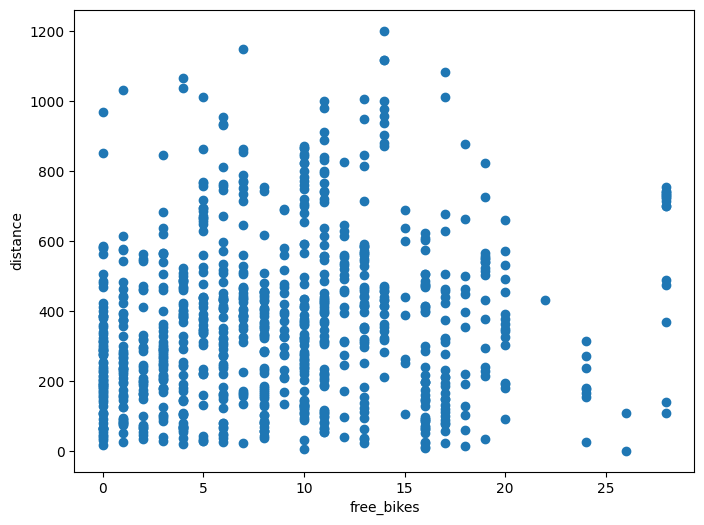

In [26]:
x= full_join['free_bikes']
y= full_join['distance']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.xlabel('free_bikes')
plt.ylabel('distance')
plt.show()


In [96]:
correlation = full_join['free_bikes'].corr(full_join['distance'])
correlation

0.1633244524848804

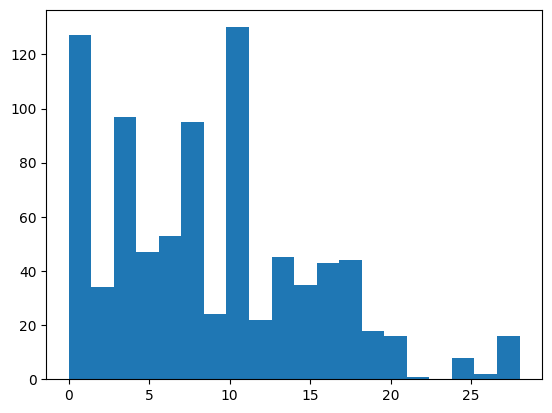

In [97]:
plt.hist(full_join['free_bikes'], bins=20)
plt.show()

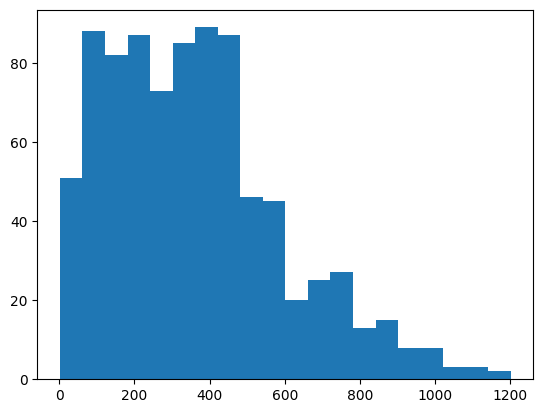

In [98]:
plt.hist(full_join['distance'], bins=20)
plt.show()

In [99]:
full_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  857 non-null    object 
 1   name        857 non-null    object 
 2   distance    857 non-null    float64
 3   rating      827 non-null    float64
 4   free_bikes  857 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 33.6+ KB


In [100]:
full_join.describe()

,distance,rating,free_bikes
count,857.000000,827.000000,857.000000
mean,361.527361,8.172068,8.726954
std,234.046485,1.030224,6.376991
min,1.973312,0.000000,0.000000
25%,177.000000,7.800000,4.000000
50%,329.820559,8.300000,8.000000
75%,482.000000,8.800000,13.000000
max,1201.087885,10.000000,28.000000


In [101]:
#rating has 30 values that are empty. I have decided to fill them with zero values
full_join['rating'] = full_join['rating'].fillna(0)
full_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  857 non-null    object 
 1   name        857 non-null    object 
 2   distance    857 non-null    float64
 3   rating      857 non-null    float64
 4   free_bikes  857 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 33.6+ KB


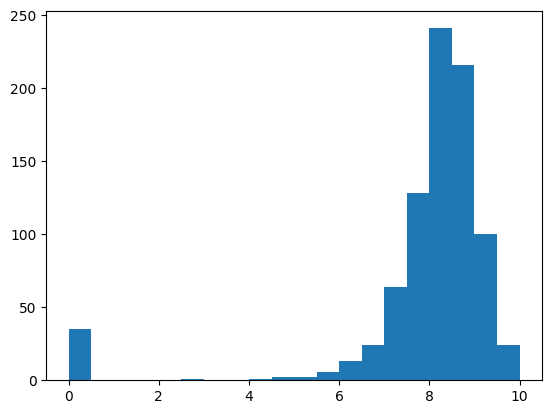

In [102]:
plt.hist(full_join['rating'], bins=20)
plt.show()

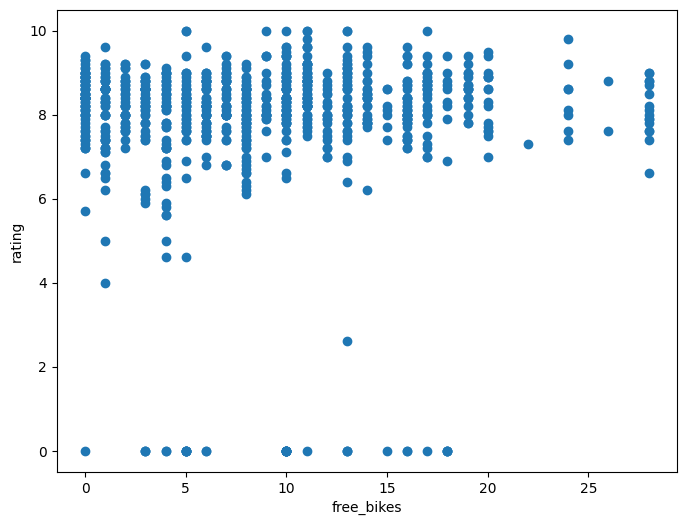

In [103]:
x= full_join['free_bikes']
y= full_join['rating']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.xlabel('free_bikes')
plt.ylabel('rating')
plt.show()

In [104]:
correlation = full_join['free_bikes'].corr(full_join['rating'])
correlation

0.016574207980216353

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [107]:
from sqlalchemy import create_engine
sqlite_db = 'sqlite:///../data/ebikes.db'

In [108]:
engine = create_engine(sqlite_db)
full_join.to_sql('points_of_interst', con=engine, index=False)

857

Look at the data before and after the join to validate your data.

In [105]:
full_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  857 non-null    object 
 1   name        857 non-null    object 
 2   distance    857 non-null    float64
 3   rating      857 non-null    float64
 4   free_bikes  857 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 33.6+ KB


In [106]:
full_join.describe()

,distance,rating,free_bikes
count,857.000000,857.000000,857.000000
mean,361.527361,7.885998,8.726954
std,234.046485,1.811835,6.376991
min,1.973312,0.000000,0.000000
25%,177.000000,7.800000,4.000000
50%,329.820559,8.200000,8.000000
75%,482.000000,8.800000,13.000000
max,1201.087885,10.000000,28.000000
